<a href="https://colab.research.google.com/github/nehaal10/Heart-Attack-Analysis/blob/main/Heart_Attack_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
heart_data=pd.read_csv('/content/drive/MyDrive/python data/heart.csv')


In [ ]:
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Figure size 432x288 with 0 Axes>

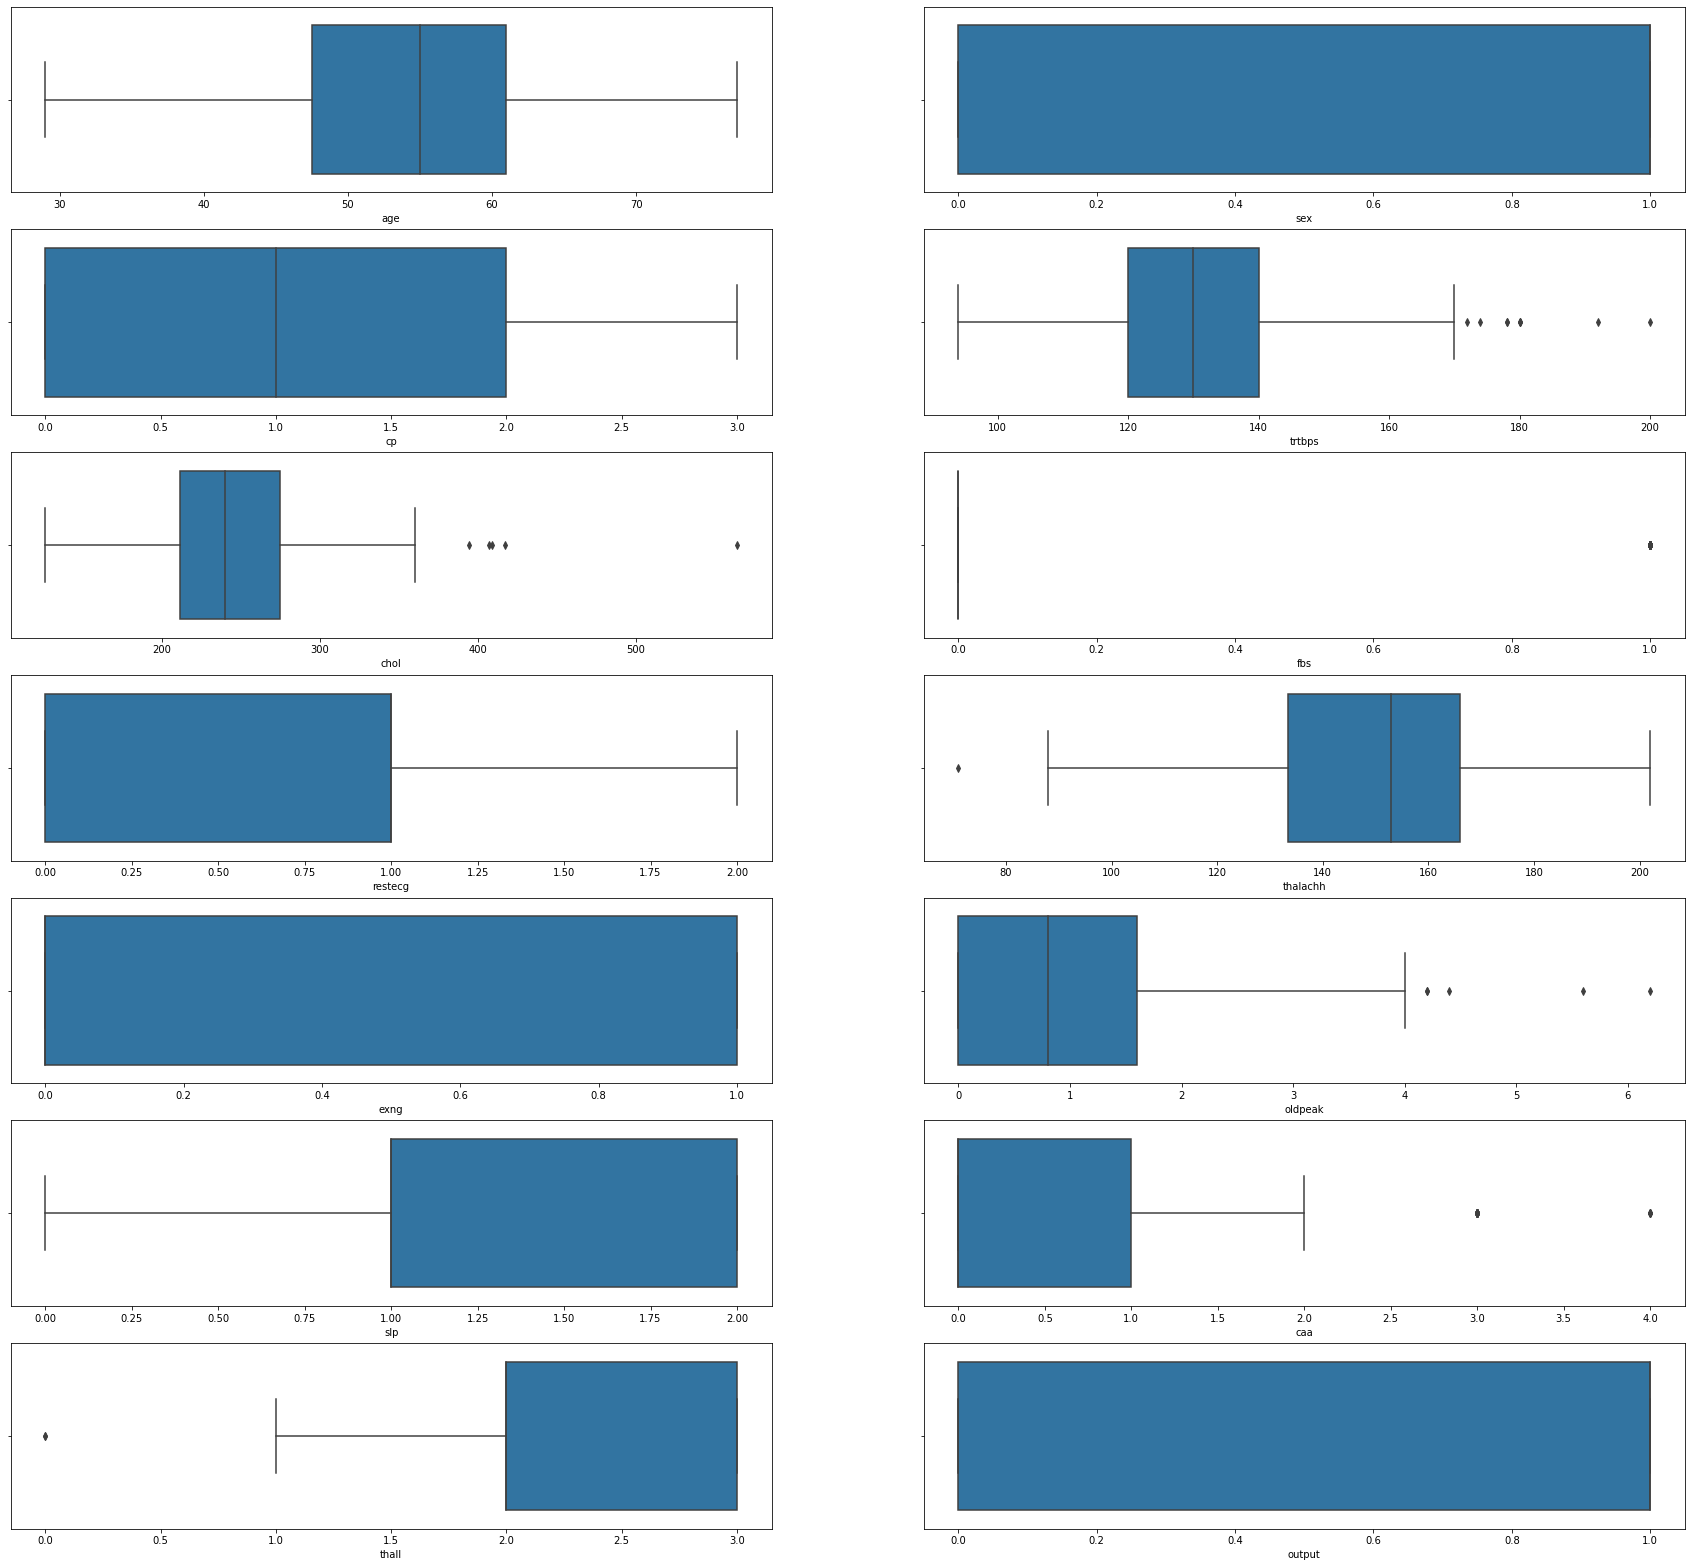

In [ ]:
col=list(heart_data.columns)
plt.figure()
plt.subplots(7,2,figsize=(30,28))
for num,i in enumerate(col):
    plt.subplot(7,2,num+1)
    sns.boxplot(x=heart_data[i])

In [ ]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
#training the model
x=heart_data.drop('output',axis=1)
y=heart_data['output']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,shuffle=True)

#creating pipelines for different model

pipe_1=Pipeline(steps=[('emsemble',RandomForestClassifier(n_estimators=250))])
pipe_2=Pipeline(steps=[('linear_model_1',LogisticRegression(penalty='l1',solver='liblinear'))])
pipe_3=Pipeline(steps=[('linear_model_2',SGDClassifier(loss='squared_hinge',penalty='l2',alpha=0.0001))])
pipe_4=Pipeline(steps=[('svm',SVC(kernel='linear'))])
pipe_5=Pipeline(steps=[('gdboost',GradientBoostingClassifier(learning_rate=0.1))])

In [ ]:
pipes=[pipe_1,pipe_2,pipe_3,pipe_4,pipe_5]
model=['RandomForestClassifier','LogisticRegression','SGDClassifier','SVC','GradientBoostingClassifier']
score={}
for i in range(len(pipes)):
    pipes[i].fit(xtrain,ytrain)
    prediction=pipes[i].predict(xtest)
    score[model[i]]=accuracy_score(ytest,prediction)

In [ ]:
ridge=RidgeClassifier(alpha=0.2,solver='auto')
ridge.fit(xtrain,ytrain)
p=ridge.predict(xtest)
score['RidgeClassifier']=accuracy_score(ytest,p)

In [ ]:
score

{'GradientBoostingClassifier': 0.7377049180327869,
 'LogisticRegression': 0.8360655737704918,
 'RandomForestClassifier': 0.7704918032786885,
 'RidgeClassifier': 0.8524590163934426,
 'SGDClassifier': 0.7213114754098361,
 'SVC': 0.8360655737704918}

Now we are going to use another method , wherein we have bunch of models and we are gonna choose the best one and do hyper parameter tunning

In [ ]:
model_params={
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[i for i in range(100,501,50)]
        }
    },
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1.0,10.0,20.0,30.0,40.0],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'log_reg':{
        'model':LogisticRegression(solver='lbfgs'),
        'params':{
            'C':[1.0,10.0,20.0,30.0,40.0]
        }
    },
    'gdboost':{
        'model':GradientBoostingClassifier(),
        'params':{
            'learning_rate':[0.1,0.01,0.2,0.02,3.0],
            'n_estimators':[i for i in range(100,501,50)]
        }
    },
    'ridge':{
        'model':RidgeClassifier(solver='auto'),
        'params':{
            'alpha':[1.0,2.0,3.0,3.5]
        }
    }
}

In [ ]:
model_params

{'gdboost': {'model': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100,
                             n_iter_no_change=None, presort='deprecated',
                             random_state=None, subsample=1.0, tol=0.0001,
                             validation_fraction=0.1, verbose=0,
                             warm_start=False),
  'params': {'learning_rate': [0.1, 0.01, 0.2, 0.02, 3.0],
   'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500]}},
 'log_reg': {'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scali

In [ ]:
score=[]
for model_name,param in model_params.items():
  rscv=RandomizedSearchCV(param['model'],param['params'],n_iter=5,cv=5,return_train_score=False)
  rscv.fit(xtrain,ytrain)
  score.append({
    'model':model_name,
    'best_score':rscv.best_score_,
    'best_param':rscv.best_params_
  })
print('end')
